# Tank Sizing Python Code for Propellants and Pressurant Using Assumptions
### Note: Only N2 for pressurant, LOX for oxidizer, and kerosene for fuel (SO FAR)
### Note: Only isothermal assumption coded (SO FAR)

In [628]:
import math
import numpy as np
import time

import warnings
warnings.filterwarnings('ignore')

# LOX Tank Volume Calculator
### Note: Density as a function of temperature and pressure yet to be implemented
Density taken at boiling point of O2

In [629]:
burntime=10 # seconds
massflow_pressurant=1.7779 #kg/s
OF=2.2 # Oxidizer to Fuel ratio
ullageRatio=1.15 # percentage of tank that is ullage
#T= # in Kelvin
density=1097.26 #kg/m^3

def loxVolumeCalc(burntime, massflow_pressurant, OF, ullageRatio):
    massflow=massflow_pressurant*OF/(OF+1)
    mass=burntime*massflow
    volume=mass/density
    volumeFinal=volume*ullageRatio
    print("lox massflow = " + str(massflow) + " kg/s")
    print("lox massflow = " + str(massflow*2.20462) + " lb/s")
    print("lox mass = " + str(mass) + " kg")
    print("lox mass = " + str(mass*2.20462) + " lb")
    print("lox tank volume = " + str(volumeFinal) + " m^3")
    print("lox tank volume = " + str(volumeFinal*35.3147) + " ft^3")

    return volume
    

loxVolume = loxVolumeCalc(burntime,massflow_pressurant,OF,ullageRatio)

lox massflow = 1.22230625 kg/s
lox massflow = 2.6947208048749998 lb/s
lox mass = 12.2230625 kg
lox mass = 26.947208048749996 lb
lox tank volume = 0.012810566205821772 m^3
lox tank volume = 0.45240130238873416 ft^3


# Kerosene Tank Volume Calculator
### Note: Density as a function of temperature and pressure yet to be implemented
Density taken at room temp. (298 K)

In [630]:
burntime=10 # seconds
massflow_pressurant=1.77 #kg/s
OF=2.2 # Oxidizer to Fuel ratio
ullageRatio=1.15 # percentage of tank that is ullage
#T= # in Kelvin
density=820 #kg/m^3

def keroVolumeCalc(burntime, massflow_pressurant, OF, ullageRatio):
    massflow=massflow_pressurant*1/(OF+1)
    mass=burntime*massflow
    volume=mass/density
    volumeFinal=volume*ullageRatio
    print("kerosene massflow = " + str(massflow) + " kg/s")
    print("kerosene massflow = " + str(massflow*2.20462) + " kg/s")
    print("kerosene mass = " + str(mass) + " kg")
    print("kerosene mass = " + str(mass*2.20462) + " lb")
    print("kerosene tank volume = " + str(volumeFinal) + " m^3")
    print("kerosene tank volume = " + str(volumeFinal*35.3147) + " ft^3")

    return volume
    
keroVolume = keroVolumeCalc(burntime,massflow_pressurant,OF,ullageRatio)

kerosene massflow = 0.553125 kg/s
kerosene massflow = 1.2194304374999998 kg/s
kerosene mass = 5.53125 kg
kerosene mass = 12.194304375 lb
kerosene tank volume = 0.007757240853658536 m^3
kerosene tank volume = 0.2739446335746951 ft^3


# Tank Height Needed to House Propellant (With Ellipsoidal Ends)
### Note: Does not account for thickness, thickness of tank assumed to be 0 in

In [631]:
semi_axis=1 #in
radius=3 #in
propVolume=0.2739 #ft^3 (ullage ratio factored in from keroVolume function)

def elpsTankHeight(semi_axis,radius, propVolume):
    propVolume=propVolume*12**3 #ft^3 to in^3
    print("propellant tank volume " + str(propVolume) + " in^3")
    elpsCapVolume=2*2/3*math.pi*radius**2*semi_axis #volume of both caps combined
    print("volume of ellipsoidal caps = " + str(elpsCapVolume) + " in^3")
    elpsTankHeight=(propVolume - elpsCapVolume)/math.pi/radius**2 #solve for tank height in between caps
    print("cylinder tank height for 6 in diameter with " + str(semi_axis) + " in ellipsoidal caps is: " + str(elpsTankHeight) + " in")

elpsTankHeight(semi_axis, radius, propVolume)

propellant tank volume 473.2992 in^3
volume of ellipsoidal caps = 37.69911184307752 in^3
cylinder tank height for 6 in diameter with 1 in ellipsoidal caps is: 15.406201609208798 in


# Pressurant Tank Volume Functions

### Note: Compressibility and Volume Functions only run with at least two pressure values inputted, if you only want to try a single pressure use P=np.ones(2)*(pressure)
### Note: Pressure must input in psi, Temperature must be input in Kelvin, mass must be in kg

## Relations:

We have three states of N2: (1) The initial state (i) of the N2 inside the pressurant tank before fire, (2) The state of the N2 leftover (L) in the pressurant tank after the fire, (3) and the state of the N2 that has displaced (D) into the propellant tanks.

Assumptions:

- Mass flow of propellants are constant
- Volumetric flow of N2 constant

Known variables:

$ V_F = ... m^3 $ Volume of fuel tank \
$ V_O = ... m^3 $ Volume of the oxidizer tank \
$ C_{backflow} = \frac{P_L}{P_{propellant}} = 1.15 $ Ratio between leftover N2 pressure and propellant pressure  \
$ P_{propellant} = 600 psi $ \
$ P_L = P_{propellant} C_{backflow} = 690 psi $ Pressure of leftover N2 \
$ P_D = P_{propellant} = 600 psi $ Pressure of displaced N2 \
$ R = 8.314 \frac{J}{mol \cdot K} $ \
$ M_{N2} = 28.01 [\frac{kg}{kmol}] \cdot \frac{1}{1000}[\frac{kmol}{mol}] = 0.02801 [\frac{kg}{mol}] $ \
$ T_i = 298 K $ Initial temperature of N2 tank \
$ t_b = 10 s $ Burntime

Unknown Variables:

$ V_{N2} = $ Volume of pressurant tank \
$ n_t = n_L + n_D = $ Total moles of N2 \
$ T_L $ Temperature of leftover N2 \
$ T_D $ Temperature of displaced N2 \
$ P_i $ Initial N2 pressure

## *Fundamentals of Engineering Thermodynamics, 8th Edition*

Redlich-Kwong Equation:

$$ P = \frac{\bar{R}T}{\bar{v}-b} - \frac{a}{\bar{v}(\bar{v}+b)T^{1/2}} $$

Table A-1:

$$ M_{N2} = 0.02801 [\frac{kg}{mol}] $$

Table A-24:

$$ a_{N2} = 15.53 [bar \frac{m^6}{kmol^2} K^{1/2}] \cdot \frac{1 [kmol^2]}{1e6 [mol^2]} \cdot \frac{1e5 [Pa]}{1[bar]} = 1.553 [Pa \frac{m^6}{mol^2} K^{1/2}] $$

$$ b_{N2} = 0.02677 [\frac{m^3}{kmol}] \cdot \frac{1 [kmol]}{1000 [mol]} = 2.677e-5 [\frac{m^3}{mol}] $$

Additionally:
$$ \bar{R} = 8.314 [\frac{J}{mol \cdot K}] $$
$$ \bar{v} = \frac{V}{n} [\frac{m^3}{mol}] $$
$$ n_t = n_L + n_D $$

Variables that can be set as a constraint:

$ P_i $ Maximum Initial Pressure \
$ T_D $ Safe Minimum N2 Temperature

Equation 1: \
$ P = P_i $ \
$ T = T_i $ \
$ \bar{v} = \frac{V_{N2}}{n_t} $

Equation 2: \
$ P = P_L $ \
$ T = T_L $ \
$ \bar{v} = \frac{V_{N2}}{n_L} $

Equation 3: \
$ P = P_D $ \
$ T = T_D $ \
$ \bar{v} = \frac{V_F + V_O}{n_D} $

## Functions:

In [632]:
V_F = keroVolume
V_O = loxVolume
V_P = V_F + V_O
C_backflow = 1.15
P_L = 600 * C_backflow * 6894.76
P_D = 600 * 6894.76
R = 8.314
M_N2 = 0.02801
T_i = 298.15
t_b = 10.0

# Isothermal Assumption
$$ T_i = T_L = T_D = T $$

Equation 3 gives us $n_D$ which will allow us to relate Equations 1 & 2 between three unknowns $P_i$, $V_{N2}$ and $n_L$. The diffused mass (moles) is constant and doesn't depend on any variables besides the volume of the propellant tanks and the pressure inside the propellant tanks.

By setting an initial pressure constraint, or guessing it, we can solve the non-linear equation for the tank volume.

The code below: (1) finds $n_D$ using iterative method, (2) calculates $V_{N2}$ and $n_L$ simultaneously using iterative method 6 times based on 6 chosen initial pressures (1000 to 6000 psi), and (3) fits a spline to these values.

In [633]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

T_D = T_i
T_L = T_i

a = 1.553
b = 2.677e-5

def n2displaced(n_D):
    return -P_D + R * T_D / ( ( V_P ) / n_D - b ) \
    - a / ( ( V_P ) / n_D * ( ( V_P ) / n_D + b )* T_D**(1/2) )

initial_guess = 1

n_D = fsolve(n2displaced, initial_guess)

print('displaced N2 mass (kg) = {}'.format(n_D*M_N2))
print('residual = {}'.format(n2displaced(n_D)))

displaced N2 mass (kg) = [0.84557467]
residual = [-4.36557457e-10]


### Using initial pressure of 6000 psi

In [634]:
P_i = 6000 * 6894.76

n_D = float(n_D)

def n2initial_leftover(vars):
    V_N2, n_L = vars
    initial = -P_i + R * T_i / ( V_N2 / ( n_L + n_D ) - b ) \
    - a / ( V_N2 / ( n_L + n_D ) * ( V_N2 / ( n_L + n_D ) + b ) * T_D**0.5 )
    leftover = -P_L + R * T_L / ( V_N2 / n_L - b ) \
    - a / ( V_N2 / n_L * ( V_N2 / n_L + b ) * T_D**0.5 )
    return [initial, leftover]

initial_guess = [0.005, 1]

V_N2, n_L = fsolve(n2initial_leftover, initial_guess)

n_t = n_L + n_D

V_N2_liters = 1000 * V_N2

m_D = n_D * M_N2

m_L = n_L * M_N2

m_t = n_t * M_N2

V = np.zeros(6)

V[5] = V_N2

print('N2 tank volume (L) = {}'.format(V_N2_liters))
print('displaced N2 mass (kg) = {}'.format(m_D))
print('leftover N2 mass (kg) = {}'.format(m_L))
print('total N2 mass (kg) = {}'.format(m_t))

N2 tank volume (L) = 2.5633125590132235
displaced N2 mass (kg) = 0.8455746666717243
leftover N2 mass (kg) = 0.13949052699936518
total N2 mass (kg) = 0.9850651936710895


### 5000 psi

In [635]:
P_i = 5000 * 6894.76

V_N2, n_L = fsolve(n2initial_leftover, initial_guess)

n_t = n_L + n_D

V_N2_liters = 1000 * V_N2

m_D = n_D * M_N2

m_L = n_L * M_N2

m_t = n_t * M_N2

V[4] = V_N2

print('N2 tank volume (L) = {}'.format(V_N2_liters))
print('displaced N2 mass (kg) = {}'.format(m_D))
print('leftover N2 mass (kg) = {}'.format(m_L))
print('total N2 mass (kg) = {}'.format(m_t))

N2 tank volume (L) = 2.9679883358883696
displaced N2 mass (kg) = 0.8455746666717243
leftover N2 mass (kg) = 0.16151220250556653
total N2 mass (kg) = 1.0070868691772907


### 4000 psi

In [636]:
P_i = 4000 * 6894.76

V_N2, n_L = fsolve(n2initial_leftover, initial_guess)

n_t = n_L + n_D

V_N2_liters = 1000 * V_N2

m_D = n_D * M_N2

m_L = n_L * M_N2

m_t = n_t * M_N2

V[3] = V_N2

print('N2 tank volume (L) = {}'.format(V_N2_liters))
print('displaced N2 mass (kg) = {}'.format(m_D))
print('leftover N2 mass (kg) = {}'.format(m_L))
print('total N2 mass (kg) = {}'.format(m_t))

N2 tank volume (L) = 3.6368435980281544
displaced N2 mass (kg) = 0.8455746666717243
leftover N2 mass (kg) = 0.1979100162139703
total N2 mass (kg) = 1.0434846828856945


### 3000 psi

In [637]:
P_i = 3000 * 6894.76

V_N2, n_L = fsolve(n2initial_leftover, initial_guess)

n_t = n_L + n_D

V_N2_liters = 1000 * V_N2

m_D = n_D * M_N2

m_L = n_L * M_N2

m_t = n_t * M_N2

V[2] = V_N2

print('N2 tank volume (L) = {}'.format(V_N2_liters))
print('displaced N2 mass (kg) = {}'.format(m_D))
print('leftover N2 mass (kg) = {}'.format(m_L))
print('total N2 mass (kg) = {}'.format(m_t))

N2 tank volume (L) = 4.931164814759658
displaced N2 mass (kg) = 0.8455746666717243
leftover N2 mass (kg) = 0.268344481179481
total N2 mass (kg) = 1.1139191478512054


### 2000 psi

In [638]:
P_i = 2000 * 6894.76

V_N2, n_L = fsolve(n2initial_leftover, initial_guess)

n_t = n_L + n_D

V_N2_liters = 1000 * V_N2

m_D = n_D * M_N2

m_L = n_L * M_N2

m_t = n_t * M_N2

V[1] = V_N2

print('N2 tank volume (L) = {}'.format(V_N2_liters))
print('displaced N2 mass (kg) = {}'.format(m_D))
print('leftover N2 mass (kg) = {}'.format(m_L))
print('total N2 mass (kg) = {}'.format(m_t))

N2 tank volume (L) = 8.330457637221489
displaced N2 mass (kg) = 0.8455746666717243
leftover N2 mass (kg) = 0.45332744222148574
total N2 mass (kg) = 1.29890210889321


### 1000 psi

In [639]:
P_i = 1000 * 6894.76

V_N2, n_L = fsolve(n2initial_leftover, initial_guess)

n_t = n_L + n_D

V_N2_liters = 1000 * V_N2

m_D = n_D * M_N2

m_L = n_L * M_N2

m_t = n_t * M_N2

V[0] = V_N2

print('N2 tank volume (L) = {}'.format(V_N2_liters))
print('displaced N2 mass (kg) = {}'.format(m_D))
print('leftover N2 mass (kg) = {}'.format(m_L))
print('total N2 mass (kg) = {}'.format(m_t))

N2 tank volume (L) = 34.435118124808476
displaced N2 mass (kg) = 0.8455746666717243
leftover N2 mass (kg) = 1.8738927321792453
total N2 mass (kg) = 2.71946739885097


### Spline Interpolation

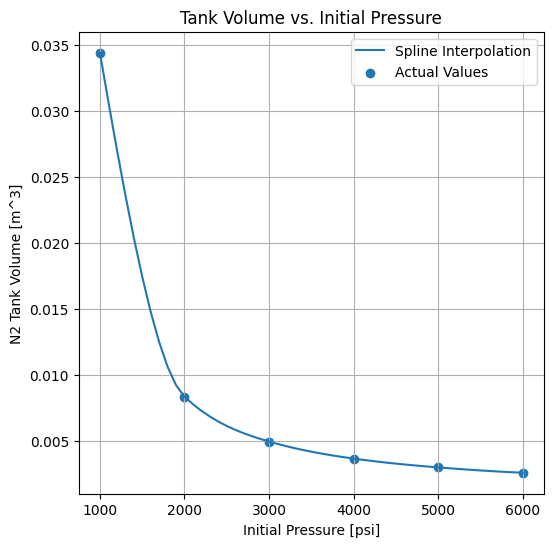

In [640]:
from scipy.interpolate import pchip

P_poly = np.linspace(1000, 6000, 51)
P_actual = np.linspace(1000, 6000, 6)

V_poly_isot = pchip(P_actual, V)

plt.figure(figsize=(6,6))
plt.title('Tank Volume vs. Initial Pressure')
plt.xlabel('Initial Pressure [psi]')
plt.ylabel('N2 Tank Volume [m^3]')
plt.grid(True)
plt.plot(P_poly, V_poly_isot(P_poly), label = 'Spline Interpolation')
plt.scatter(P_actual,V, label = 'Actual Values')

plt.legend(loc='best')

plt.show()

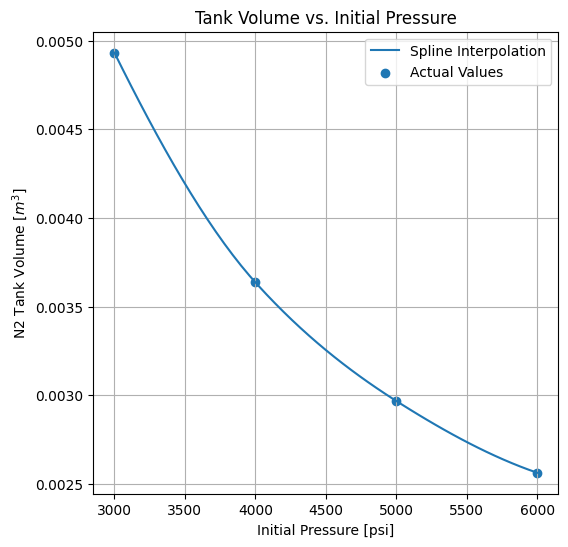

In [641]:
P_poly = np.linspace(3000, 6000, 51)
P_actual = np.linspace(3000, 6000, 4)

V_poly_isot = pchip(P_actual, V[2:6])

plt.figure(figsize=(6,6))
plt.title('Tank Volume vs. Initial Pressure')
plt.xlabel('Initial Pressure [psi]')
plt.ylabel('N2 Tank Volume [$m^3$]')
plt.grid(True)
plt.plot(P_poly, V_poly_isot(P_poly), label = 'Spline Interpolation')
plt.scatter(P_actual,V[2:6], label = 'Actual Values')

plt.legend(loc='best')

plt.show()

# IN PROGRESS: Isenthalpic Assumption
To conserve enthalpy per unit mass:
$$ \bar{h} = \frac{H}{n} $$
$$ \frac{H_1}{n_1} = \frac{H_2}{n_2} $$
$$ H = C_p T $$

Assume Cp is constant between initial and final condition
$$ \frac{T_1}{n_1} = \frac{T_2}{n_2} $$